## Reference: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split\
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

from scipy import stats as ss

import collections as co

# Specials.
import scipy.special as spec


In [2]:
pd.set_option('display.max_rows', 1000)

## Import Dataset

In [3]:
df = pd.read_csv('Diet.csv')


In [4]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


## Create 'BMI_change' Column

In [5]:
#BMI_change_df = df

In [6]:
df['BMI_start'] = df["pre.weight"] / (df["Height"] / 100)**2
df["BMI_end"] = df["weight6weeks"] / (df["Height"] / 100)**2
df["BMI_change"] = df['BMI_start'] - df["BMI_end"]

In [7]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
0,25,NaN,41,171,60,2,60.0,20.519134,20.519134,0.000000
1,26,NaN,32,174,103,2,103.0,34.020346,34.020346,0.000000
2,1,0,22,159,58,1,54.2,22.942130,21.439025,1.503105
3,2,0,46,192,60,1,54.0,16.276042,14.648438,1.627604
4,3,0,55,170,64,1,63.3,22.145329,21.903114,0.242215
5,4,0,33,171,64,1,61.1,21.887076,20.895318,0.991758
6,5,0,50,170,65,1,62.2,22.491349,21.522491,0.968858
7,6,0,50,201,66,1,64.0,16.336229,15.841192,0.495037
8,7,0,37,174,67,1,65.0,22.129740,21.469150,0.660589
9,8,0,28,176,69,1,60.5,22.275310,19.531250,2.744060


In [8]:
#Run once:
df['Diet'] = df['Diet'] - 1

In [9]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
0,25,NaN,41,171,60,1,60.0,20.519134,20.519134,0.000000
1,26,NaN,32,174,103,1,103.0,34.020346,34.020346,0.000000
2,1,0,22,159,58,0,54.2,22.942130,21.439025,1.503105
3,2,0,46,192,60,0,54.0,16.276042,14.648438,1.627604
4,3,0,55,170,64,0,63.3,22.145329,21.903114,0.242215
5,4,0,33,171,64,0,61.1,21.887076,20.895318,0.991758
6,5,0,50,170,65,0,62.2,22.491349,21.522491,0.968858
7,6,0,50,201,66,0,64.0,16.336229,15.841192,0.495037
8,7,0,37,174,67,0,65.0,22.129740,21.469150,0.660589
9,8,0,28,176,69,0,60.5,22.275310,19.531250,2.744060


In [10]:
df.to_csv('diet_BMI_incl.csv')

## Assumption 1: Dependent Variable

### Dependent: Weightoss

In [10]:
BMI_change = df['BMI_change']

## Assumption 2: Independent Variable

### 1: Diet

In [11]:
Diet = df['Diet']

### 2: gender

In [12]:
gender = df['gender']

## Assumption 4: Outliers

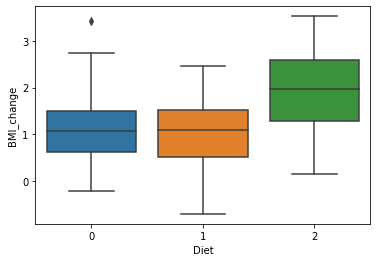

In [13]:
sns.boxplot(x=Diet, y=BMI_change)

In [14]:
BMI_change.describe()

count    78.000000
mean      1.350125
std       0.934202
min      -0.693619
25%       0.681503
50%       1.271620
75%       1.986516
max       3.520950
Name: BMI_change, dtype: float64

In [26]:
diet_1 = df[df["Diet"] == 1]["BMI_change"].to_list()
diet_2 = df[df["Diet"] == 2]["BMI_change"].to_list()
diet_3 = df[df["Diet"] == 3]["BMI_change"].to_list()

In [27]:
mean = df.BMI_change.mean()
mean

1.3501245872689778

## Assumption 5: Normality

In [15]:
from seaborn import displot

c:\users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


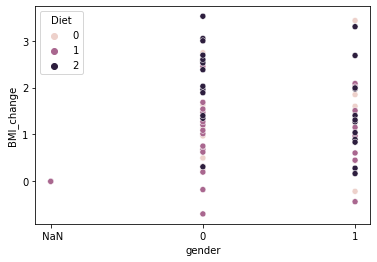

In [16]:
sns.scatterplot(df['gender'], BMI_change, hue=df['Diet'])

c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

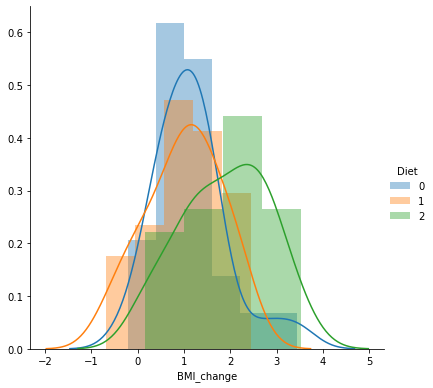

In [17]:
sns.FacetGrid(df,hue='Diet',height=5.5).map(sns.distplot,'BMI_change', kde=True).add_legend()

In [18]:
diet_one = BMI_change[Diet==0]
diet_two = BMI_change[Diet==1]
diet_three = BMI_change[Diet==2]

### Run Shapiro Wilks Test

In [19]:
ss.shapiro(diet_one)

ShapiroResult(statistic=0.9227969646453857, pvalue=0.06736458837985992)

In [20]:
ss.shapiro(diet_two)

ShapiroResult(statistic=0.9763475060462952, pvalue=0.7722797989845276)

In [21]:
ss.shapiro(diet_three)

ShapiroResult(statistic=0.9632238149642944, pvalue=0.43632328510284424)

#### All 3 distributions for the diets in terms of the dependent variable 'BMI_change', have a p-value greater than 0.05. As such, the evidence suggests that all 3 groups are normally distributed

## Assumption 6: Homogeneity of Variances

### Levene's Test for Homogeneity - using Levene() from Scipy-stats

In [22]:
ss.levene(
    BMI_change[Diet==0],
    BMI_change[Diet==1],
    BMI_change[Diet==2]
)

LeveneResult(statistic=1.0043048620443853, pvalue=0.37117119715835095)

### When studying the homogeneity of 'BMI_change' amongst the three categories of Diets above are showing a p-value greater than 0.05.

### Infact, it is much greater at *0.53*.

***

# One-way Anova

<br>

In [23]:
ss.f_oneway(
    BMI_change[Diet==0],
    BMI_change[Diet==1],
    BMI_change[Diet==2]
    )

F_onewayResult(statistic=8.344341031617384, pvalue=0.0005345120426406237)

### As we see above, the p-value of 0.003 (*lower than 0.05*) suggests that the mean-values for the three diets in the independent variable are different.

***

## Unequal Variances Welch Anova

<br>


In [24]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [25]:
# Perform the test.
welch_anova_np(
    BMI_change[Diet==0],
    BMI_change[Diet==1],
    BMI_change[Diet==2]
)

F_onewayResult(statistic=7.497471261642536, pvalue=0.0014240568918744995)

### The p-value obtained from this Anova test of different variances is 0.00445 - this is significantly below the threshold of 0.05.

### The conclusion here is that the mean-weight lost by people who tried out diets 1, 2 and 3 over 6 weeks, **are different.**